# Part 2: Design a biasing potential

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import plumed
from scipy.constants import R

RT = 300 * R * 1e-3

In [6]:
df = plumed.read_as_pandas('data/bias.COLVAR')

weights = np.exp(df['bias.bias'] / RT)

# Rescaling factor for "nicer" integral values of the coordination numbers
scale = 1.039661

x = scale * (df.nop - df.now) + 6
y = scale * (df.nop + df.now) - 6

/tmp/ipykernel_16255/1149377106.py:1: UserWarning: cannot load PLUMED instance, conversions will not be available
  df = plumed.read_as_pandas('data/bias.COLVAR')


In [7]:
def bias_fn(x, y):
    X = x + 0.12 * (1 - np.cos(x * np.pi))
    Y = 0.7*(4*y - (1 - np.cos(x * np.pi)))
    return -1.875 * (X > 0) * (X < 2) * (Y > 0) * (Y < 2) * (1 - np.cos(X * np.pi)) * (1 - np.cos(Y * np.pi))

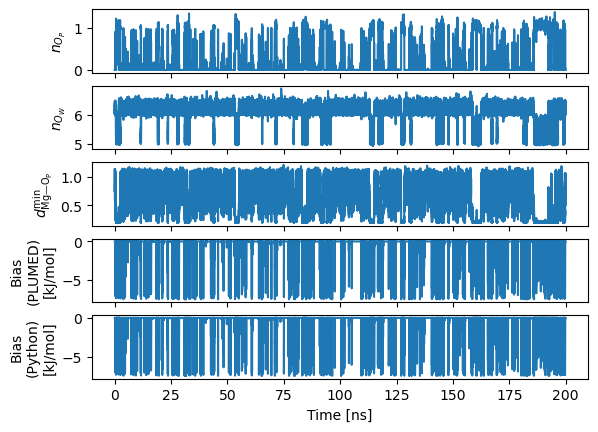

In [10]:
fig, axarr = plt.subplots(nrows=5, sharex=True)

ax = axarr[0]
ax.plot(df.time / 1000, df.nop * scale)
ax.set_ylabel(r"$n_{O_P}$")

ax = axarr[1]
ax.plot(df.time / 1000, df.now * scale)
ax.set_ylabel(r"$n_{O_W}$")

ax = axarr[2]
ax.plot(df.time / 1000, df['dop.lowest'])
ax.set_ylabel(r"$d_{\mathrm{Mg—O_P}}^\mathrm{min}$")

ax = axarr[3]
ax.plot(df.time / 1000, df['bias.bias'])
ax.set_ylabel("Bias\n(PLUMED)\n[kJ/mol]")

ax = axarr[4]
ax.plot(df.time / 1000, bias_fn(x, y))
ax.set_ylabel("Bias\n(Python)\n[kJ/mol]")

ax.set_xlabel("Time [ns]")

plt.savefig('figures/bias_timeseries.png')

### Compute Kish ratio

In [11]:
def kish_ratio(weights):
    return weights.sum()**2 / (weights**2).sum() / len(weights)

print(kish_ratio(weights))

0.9827495511664177
